**XGBoost Classifier**

Library imports

In [ ]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

sys.path.insert(0, str(Path.cwd().parent))

Data Imports

In [ ]:
from utils.utils import save_experiment, train_and_evaluate_xgboost, grid_search_joblib
from configs.config_local import DATASET_PATH, ITW_DATASET_PATH, FEATURES_DIR

Training / Validation / Test features:
Using feature set 40_2048_512_128 (adjust filenames to match your extracted features).

In [ ]:
train_path = os.path.join(FEATURES_DIR, "training_features_mean_20_128_256_128.parquet")
val_path = os.path.join(FEATURES_DIR, "validation_features_mean_20_128_256_128.parquet")
test_path = os.path.join(FEATURES_DIR, "testing_features_mean_20_128_256_128.parquet")

Training with default hyperparameters

In [ ]:
pipeline, metrics, xgb_params, feature_names, metadata_extra = train_and_evaluate_xgboost(
    train_path=train_path,
    val_path=val_path,
    test_path=test_path
)

print("Metadata:", metadata_extra)
print("Metrics:", metrics)

Scale_pos_weight: 1.00
Training XGBoost on 53868 samples...
[23:36:19] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (53868, 195, 10504260).
[23:36:19] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (10798, 195, 2105610).
[0]	validation_0-aucpr:0.98010
[1]	validation_0-aucpr:0.98623
[2]	validation_0-aucpr:0.98982
[3]	validation_0-aucpr:0.99242
[4]	validation_0-aucpr:0.99374
[5]	validation_0-aucpr:0.99418
[6]	validation_0-aucpr:0.99433
[7]	validation_0-aucpr:0.99518
[8]	validation_0-aucpr:0.99536
[9]	validation_0-aucpr:0.99557
[10]	validation_0-aucpr:0.99579
[11]	validation_0-aucpr:0.99603
[12]	validation_0-aucpr:0.99646
[13]	validation_0-aucpr:0.99664
[14]	validation_0-aucpr:0.99682
[15]	validation_0-aucpr:0.99701
[16]	validation_0-aucpr:0.99714
[17]	validation_0-aucpr:0.99726
[18]	validation_0-aucpr:0.99740
[19]	validation_0-auc

Feature Importance

Top 10 Features:
                      Feature  Importance
20          mfcc_delta_mean_0    0.205653
60                rmse_mean_0    0.067542
40         mfcc_delta2_mean_0    0.051408
43         mfcc_delta2_mean_3    0.026661
184  mel_spectrogram_mean_117    0.024593
192  mel_spectrogram_mean_125    0.024012
181  mel_spectrogram_mean_114    0.023300
41         mfcc_delta2_mean_1    0.022265
182  mel_spectrogram_mean_115    0.018638
194  mel_spectrogram_mean_127    0.018473


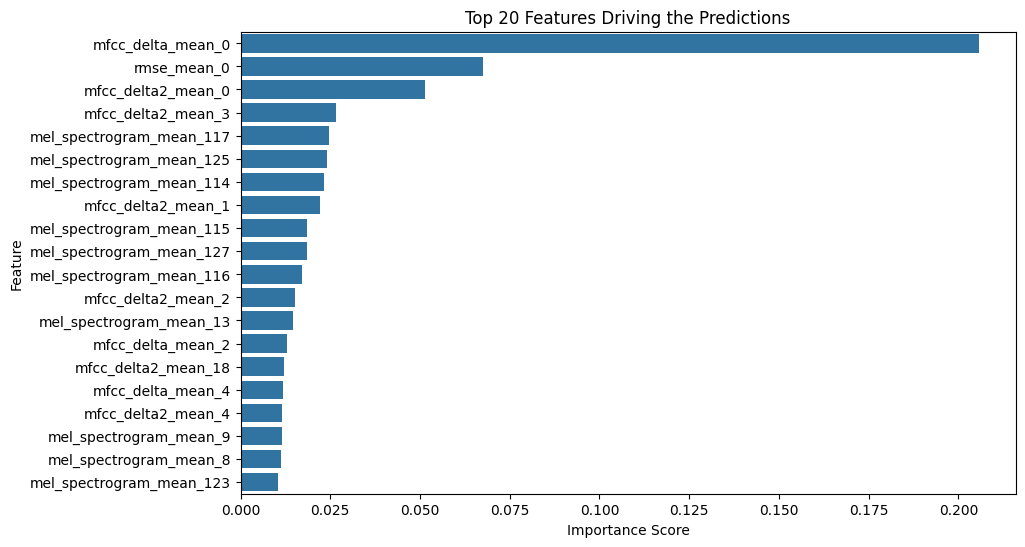

In [ ]:
xgb_model = pipeline.named_steps['xgb']
importances = xgb_model.feature_importances_

feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Top 10 Features:")
print(feature_imp_df.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(20))
plt.title('Top 20 Features Driving the Predictions')
plt.xlabel('Importance Score')
plt.show()

In [ ]:
saved_path = save_experiment(
    model=pipeline,
    metrics=metrics,
    experiment_dir="experiments",
    experiment_name="XGB_Baseline_Audio_v1",
    model_params=xgb_params,
    feature_names=feature_names,
    metadata_extra=metadata_extra
)

Experiment saved to: experiments\XGB_Baseline_Audio_v1


**Validate using the ITW Dataset**

In [ ]:
itw_val_path = os.path.join(ITW_DATASET_PATH, "normalized_features", "itw_features_mean_20_128_256_128_trimmed_loudness_normalized.parquet")

In [ ]:

params = {
    "max_depth": 6,
    "learning_rate": 0.05,
    "subsample": 0.8,
    "colsample_bytree": 1,
    "gamma": 0,
    "reg_alpha": 0,
    "reg_lambda": 1,
}

pipeline, metrics, xgb_params, feature_names, metadata_extra = train_and_evaluate_xgboost(
    train_path=train_path,
    val_path=val_path,
    test_path=itw_val_path
)

print("Metadata:", metadata_extra)
print("Metrics:", metrics)

Scale_pos_weight: 1.00
Training XGBoost on 53868 samples...
[00:44:17] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (53868, 195, 10504260).
[00:44:17] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (10798, 195, 2105610).
[0]	validation_0-aucpr:0.98216
[1]	validation_0-aucpr:0.99208
[2]	validation_0-aucpr:0.99502
[3]	validation_0-aucpr:0.99584
[4]	validation_0-aucpr:0.99683
[5]	validation_0-aucpr:0.99683
[6]	validation_0-aucpr:0.99730


c:\Users\geon9\MSc\audio-deepfake-detection\.venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [00:44:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "class_weight" } are not used.

  self.starting_round = model.num_boosted_rounds()


[7]	validation_0-aucpr:0.99762
[8]	validation_0-aucpr:0.99769
[9]	validation_0-aucpr:0.99773
[10]	validation_0-aucpr:0.99773
[11]	validation_0-aucpr:0.99776
[12]	validation_0-aucpr:0.99787
[13]	validation_0-aucpr:0.99790
[14]	validation_0-aucpr:0.99801
[15]	validation_0-aucpr:0.99801
[16]	validation_0-aucpr:0.99804
[17]	validation_0-aucpr:0.99812
[18]	validation_0-aucpr:0.99814
[19]	validation_0-aucpr:0.99828
[20]	validation_0-aucpr:0.99836
[21]	validation_0-aucpr:0.99850
[22]	validation_0-aucpr:0.99851
[23]	validation_0-aucpr:0.99856
[24]	validation_0-aucpr:0.99861
[25]	validation_0-aucpr:0.99864
[26]	validation_0-aucpr:0.99864
[27]	validation_0-aucpr:0.99864
[28]	validation_0-aucpr:0.99866
[29]	validation_0-aucpr:0.99868
[30]	validation_0-aucpr:0.99872
[31]	validation_0-aucpr:0.99874
[32]	validation_0-aucpr:0.99880
[33]	validation_0-aucpr:0.99884
[34]	validation_0-aucpr:0.99887
[35]	validation_0-aucpr:0.99893
[36]	validation_0-aucpr:0.99895
[37]	validation_0-aucpr:0.99897
[38]	valida

**Hyperparameter Grid Search**

In [ ]:
from sklearn.impute import SimpleImputer

base_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('xgb', XGBClassifier(eval_metric='aucpr', random_state=42))
])

param_grid = {
    'xgb__max_depth': [4, 6, 8],
    'xgb__learning_rate': [0.25, 0.05, 0.01],
    'xgb__subsample': [1, 0.8, 0.5],
    'xgb__colsample_bytree': [0.7, 0.8, 1],
    'xgb__scale_pos_weight': [0.2, 1, 2, 5]
}

final_model, test_metrics, val_metrics, best_params, val_results, metadata, feature_names = grid_search_joblib(
    model=base_pipe,
    param_grid=param_grid,
    train_path=train_path,
    val_path=test_path,
    test_path=itw_val_path,
    n_jobs=-1,
    verbose=2
)

print(f"Test metrics: {test_metrics}")
print(f"Val metrics: {val_metrics}")

Number of fits: 324 with n_jobs=-1 parallel jobs


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:  

[1] {'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.25, 'xgb__max_depth': 4, 'xgb__scale_pos_weight': 0.2, 'xgb__subsample': 1} | val_acc=0.6019 | val_f1=0.5553
[2] {'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.25, 'xgb__max_depth': 4, 'xgb__scale_pos_weight': 0.2, 'xgb__subsample': 0.8} | val_acc=0.5893 | val_f1=0.5383
[3] {'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.25, 'xgb__max_depth': 4, 'xgb__scale_pos_weight': 0.2, 'xgb__subsample': 0.5} | val_acc=0.6344 | val_f1=0.6005
[4] {'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.25, 'xgb__max_depth': 4, 'xgb__scale_pos_weight': 1, 'xgb__subsample': 1} | val_acc=0.6951 | val_f1=0.6859
[5] {'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.25, 'xgb__max_depth': 4, 'xgb__scale_pos_weight': 1, 'xgb__subsample': 0.8} | val_acc=0.6782 | val_f1=0.6665
[6] {'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.25, 'xgb__max_depth': 4, 'xgb__scale_pos_weight': 1, 'xgb__subsample': 0.5} | val_acc=0.6899 | val_

In [11]:
print(best_params)
final_model.get_params()

{'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.25, 'xgb__max_depth': 4, 'xgb__scale_pos_weight': 2, 'xgb__subsample': 0.8}


{'memory': None,
 'steps': [('imputer', SimpleImputer(strategy='median')),
  ('xgb',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=0.8, device=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric='aucpr', feature_types=None,
                 feature_weights=None, gamma=None, grow_policy=None,
                 importance_type=None, interaction_constraints=None,
                 learning_rate=0.25, max_bin=None, max_cat_threshold=None,
                 max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
                 max_leaves=None, min_child_weight=None, missing=nan,
                 monotone_constraints=None, multi_strategy=None, n_estimators=None,
                 n_jobs=None, num_parallel_tree=None, ...))],
 'transform_input': None,
 'verbose': False,
 'imputer': SimpleImputer(strategy='median'),
 'xgb': XGBClassifier(base_s

In [28]:
save_experiment(
    final_model,
    test_metrics,
    experiment_dir=os.path.join("experiments", "XGB_grid"),
    model_params=best_params,
    feature_names=feature_names,
    metadata_extra=metadata,
    val_results=val_results,
)

Experiment saved to: experiments\XGB_grid\exp_20260203_005557


'experiments\\XGB_grid\\exp_20260203_005557'

**No MEL Attempt**

In [5]:
train_data = pd.read_parquet(train_path)
test_data = pd.read_parquet(test_path)

train_data_no_mel = train_data.loc[:, ~train_data.columns.str.startswith("mel_spectrogram")]
test_data_no_mel = test_data.loc[:, ~test_data.columns.str.startswith("mel_spectrogram")]

In [6]:
save_train_no_mel_data_path = os.path.join(FEATURES_DIR, "training_features_mean_20_128_256_128_no_mel.parquet")
train_data_no_mel.to_parquet(save_train_no_mel_data_path)

save_test_no_mel_data_path = os.path.join(FEATURES_DIR, "testing_features_mean_20_128_256_128_no_mel.parquet")
test_data_no_mel.to_parquet(save_test_no_mel_data_path)

In [ ]:
itw_test_data_path = os.path.join(ITW_DATASET_PATH, 'normalized_features',"itw_features_mean_20_128_256_128_trimmed_loudness_normalized.parquet")
itw_test_data = pd.read_parquet(itw_test_data_path)
itw_test_data_no_mel = itw_test_data.loc[:, ~itw_test_data.columns.str.startswith("mel_spectrogram")]
save_itw_test_data_no_mel_path = os.path.join(ITW_DATASET_PATH, 'normalized_features',"itw_features_mean_20_128_256_128_no_mel_trimmed_loudness_normalized.parquet")
itw_test_data_no_mel.to_parquet(save_itw_test_data_no_mel_path)

In [10]:
params = {
    "max_depth": 4,
    "learning_rate": 0.25,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "scale_pos_weight": 2,
    "eval_metric": "aucpr",
    "random_state": 42,
    #"objective":"binary:logistic"
}

pipeline, metrics, xgb_params, feature_names, metadata_extra = train_and_evaluate_xgboost(
    train_path=save_train_no_mel_data_path,
    val_path=save_test_no_mel_data_path,
    test_path=save_itw_test_data_no_mel_path,
    xgb_params=params
)

print("Metadata:", metadata_extra)
print("Metrics:", metrics)

Training XGBoost on 53868 samples...
[0]	validation_0-aucpr:0.67813
[1]	validation_0-aucpr:0.69436
[2]	validation_0-aucpr:0.67364
[3]	validation_0-aucpr:0.68366
[4]	validation_0-aucpr:0.70272
[5]	validation_0-aucpr:0.72312
[6]	validation_0-aucpr:0.72677
[7]	validation_0-aucpr:0.74044
[8]	validation_0-aucpr:0.74775
[9]	validation_0-aucpr:0.75063
[10]	validation_0-aucpr:0.75699
[11]	validation_0-aucpr:0.74918
[12]	validation_0-aucpr:0.74478
[13]	validation_0-aucpr:0.75437
[14]	validation_0-aucpr:0.76090
[15]	validation_0-aucpr:0.76143
[16]	validation_0-aucpr:0.75947
[17]	validation_0-aucpr:0.73563
[18]	validation_0-aucpr:0.73798
[19]	validation_0-aucpr:0.71367
[20]	validation_0-aucpr:0.73669
[21]	validation_0-aucpr:0.74543
[22]	validation_0-aucpr:0.75358
[23]	validation_0-aucpr:0.76045
[24]	validation_0-aucpr:0.75733
[25]	validation_0-aucpr:0.75607
[26]	validation_0-aucpr:0.77644
[27]	validation_0-aucpr:0.77931
[28]	validation_0-aucpr:0.79217
[29]	validation_0-aucpr:0.79106
[30]	validati

In [9]:
pipeline.get_params()

{'memory': None,
 'steps': [('imputer', SimpleImputer(strategy='median')),
  ('xgb',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=0.8, device=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric='aucpr', feature_types=None,
                 feature_weights=None, gamma=None, grow_policy=None,
                 importance_type=None, interaction_constraints=None,
                 learning_rate=0.25, max_bin=None, max_cat_threshold=None,
                 max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
                 max_leaves=None, min_child_weight=None, missing=nan,
                 monotone_constraints=None, multi_strategy=None, n_estimators=None,
                 n_jobs=None, num_parallel_tree=None, ...))],
 'transform_input': None,
 'verbose': False,
 'imputer': SimpleImputer(strategy='median'),
 'xgb': XGBClassifier(base_s